In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Load data

In [3]:
petrol_prices = pd.read_csv('petrol_prices.csv', index_col=0)

petrol_prices['period'] = pd.to_datetime(petrol_prices['period'])

petrol_prices.rename(columns={'value': 'price'}, inplace=True)

In [383]:
# Import state annual CO2 emissions in lb/MWh
col = ['State abbreviation', 'State annual CO2 equivalent total output emission rate (lb/MWh)']
state_co2 = pd.read_excel('egrid2020_data.xlsx', sheet_name='ST20', usecols=col)
state_co2 = state_co2.drop(labels=0)
state_co2 = state_co2.rename(columns={'State abbreviation': 'state', 
                              'State annual CO2 equivalent total output emission rate (lb/MWh)': 
                                      'co2_lb/MWh'})
state_co2.head()

,state,co2_lb/MWh
1,AK,966.128
2,AL,721.058
3,AR,951.287
4,AZ,736.979
5,CA,453.118


In [385]:
state_co2['co2_g/kWh'] = state_co2['co2_lb/MWh'] / 1000 * 453.59

In [386]:
state_co2.head()

,state,co2_lb/MWh,co2_g/kWh
1,AK,966.128,438.226
2,AL,721.058,327.064698
3,AR,951.287,431.49427
4,AZ,736.979,334.286305
5,CA,453.118,205.529794


In [387]:
# Import US annual CO2 emissions in lb/MWh
col = ['U.S. annual CO2 equivalent total output emission rate (lb/MWh)']
us_co2 = pd.read_excel('egrid2020_data.xlsx', sheet_name='US20', usecols=col)
us_co2 = us_co2['U.S. annual CO2 equivalent total output emission rate (lb/MWh)'].iloc[1]

us_co2_g_kwh = us_co2 / 1000 * 435.59
us_co2_g_kwh

358.32548138999994

In [236]:
# largest_date = str(list(petrol_prices[(petrol_prices['area-name'] == 'PADD 3') & \
#                                       (petrol_prices['product-name'] == 'No 2 Diesel')]\
#                         ['period'].nlargest(2))[1].date())

In [235]:
# list(petrol_prices[(petrol_prices['area-name'] == 'PADD 3') & (petrol_prices['product-name'] == 'No 2 Diesel')]\
# ['period'].nlargest(2))[1].date()

datetime.date(2022, 12, 19)

In [230]:
# url = f'https://api.eia.gov/v2/petroleum/pri/gnd/data/?api_key=qUwQdIbWCPzMsfeM8l9KgoATXxByk81sf3IfmugR&frequency=weekly&data[0]=value&facets[product][]=EPD2D&facets[product][]=EPMMU&facets[product][]=EPMPU&facets[product][]=EPMRU&facets[duoarea][]=NUS&facets[duoarea][]=R10&facets[duoarea][]=R1X&facets[duoarea][]=R1Y&facets[duoarea][]=R1Z&facets[duoarea][]=R20&facets[duoarea][]=R30&facets[duoarea][]=R40&facets[duoarea][]=R50&facets[duoarea][]=R5XCA&facets[duoarea][]=SCA&facets[duoarea][]=SCO&facets[duoarea][]=SFL&facets[duoarea][]=SFL&facets[duoarea][]=SMN&facets[duoarea][]=SNY&facets[duoarea][]=SOH&facets[duoarea][]=STX&facets[duoarea][]=SWA&start={largest_date}&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'
# r = requests.get(url)
# json_data1 = r.json()
# temp = pd.DataFrame(json_data1['response']['data'])

# petrol_prices = pd.concat([petrol_prices, temp])

# petrol_prices['period'] = pd.to_datetime(petrol_prices['period'])

In [162]:
# offset_list = list(range(0, 60000, 5000))
# petrol_prices = pd.DataFrame()

# for offset in offset_list:
#     url = f'https://api.eia.gov/v2/petroleum/pri/gnd/data/?api_key=qUwQdIbWCPzMsfeM8l9KgoATXxByk81sf3IfmugR&frequency=weekly&data[0]=value&facets[product][]=EPD2D&facets[product][]=EPMMU&facets[product][]=EPMPU&facets[product][]=EPMRU&facets[duoarea][]=NUS&facets[duoarea][]=R10&facets[duoarea][]=R1X&facets[duoarea][]=R1Y&facets[duoarea][]=R1Z&facets[duoarea][]=R20&facets[duoarea][]=R30&facets[duoarea][]=R40&facets[duoarea][]=R50&facets[duoarea][]=R5XCA&facets[duoarea][]=SCA&facets[duoarea][]=SCO&facets[duoarea][]=SFL&facets[duoarea][]=SFL&facets[duoarea][]=SMN&facets[duoarea][]=SNY&facets[duoarea][]=SOH&facets[duoarea][]=STX&facets[duoarea][]=SWA&start=2010-01-01&sort[0][column]=period&sort[0][direction]=desc&offset={offset}&length=5000'
#     r = requests.get(url)
#     json_data1 = r.json()
#     temp = pd.DataFrame(json_data1['response']['data'])
    
#     petrol_prices = pd.concat([petrol_prices, temp])

# petrol_prices['period'] = pd.to_datetime(petrol_prices['period'])

In [200]:
# petrol_prices.to_csv('petrol_prices.csv')

In [4]:
diesel = petrol_prices[petrol_prices['product-name'] == 'No 2 Diesel']
regular_gas = petrol_prices[petrol_prices['product-name'] == 'Conventional Regular Gasoline']
premium_gas = petrol_prices[petrol_prices['product-name'] == 'Conventional Premium Gasoline']
midgrade_gas = petrol_prices[petrol_prices['product-name'] == 'Gasoline Conventional Midgrade']

In [199]:
# Get vehicles database
url_cars = 'https://www.fueleconomy.gov/feg/epadata/vehicles.csv'
cars = pd.read_csv(url_cars, low_memory=False)

# url_gas = 'https://www.eia.gov/petroleum/gasdiesel/xls/pswrgvwall.xls'
# gas_prices = pd.read_excel(url_gas, sheet_name='Data 1', skiprows=2, parse_dates=['Date'])

# url_diesel = 'https://www.eia.gov/petroleum/gasdiesel/xls/psw18vwall.xls'
# diesel_prices = pd.read_excel(url_diesel, sheet_name='Data 1', skiprows=2, parse_dates=['Date'])

In [100]:
# url_gas = 'https://www.eia.gov/petroleum/gasdiesel/includes/mogas_recent_prices_and_SEs.xlsx'
# cols = ['Date', 'Geographic_Area', 'Grade', 'Average_Price_Conventional_Areas', 'SE_Conventional_Areas']
# gas_prices = pd.read_excel(url_gas, usecols=cols)

In [113]:
# gas_prices[(gas_prices['Geographic_Area'] == 'Midwest (PADD 2)') & \
#            (gas_prices['Grade'] == 'Regular')]['Date'].min()

Timestamp('2018-05-14 00:00:00')

In [371]:
# cars.to_csv('cars_database.csv')
# gas_prices.to_csv('gas_prices.csv')

In [6]:
elec_url = 'https://www.eia.gov/electricity/data/eia861m/xls/sales_revenue.xlsx'

# Get monthly residential electricity data
electricity_prices = pd.read_excel(elec_url, sheet_name='Monthly-States', usecols='A:D, H', 
                            skiprows=2, skipfooter=1, parse_dates= {"period" : ["Year","Month"]},)

us_elec = pd.read_excel(elec_url, sheet_name='US-YTD', usecols='A:C, G', 
                            skiprows=2, skipfooter=1)#, parse_dates= {"Date" : ["Year","Month"]},)

# Price in Cents/kWh
electricity_prices = electricity_prices.rename(columns={'Cents/kWh': 'price'})
us_elec = us_elec.rename(columns={'Cents/kWh': 'price'})

# Remove yearly average
us_elec = us_elec[us_elec['MONTH'] != '.']

# Change date information into Datetime
us_elec['day'] = '1'
us_elec['period'] = pd.to_datetime(us_elec[['Year', 'MONTH', 'day']])
us_elec = us_elec.drop(['Year', 'MONTH', 'day'], axis=1)

In [7]:
# def column_rename(df, sub2):
#     '''Function to rename columns in the gas and diesel price DataFrames. Removes everything before the first substring
#     and after second substrings, including the substrings.
    
#     Args:
#         df: DataFrame whose columns need to be renamed (either gas_prices or diesel_prices).
#         sub2(str): Second substring to search for in each header. This will remove everything after 
#             and including this string
            
#     Returns:
#         df: returns the dataframe with renamed columns.
#          '''
#     columns = df.columns.values.tolist()

#     sub1 = 'Weekly '
#     sub2 = sub2

#     new_column = []
#     for name in columns:
#         if sub1 in name:

#             # get index of substrings
#             idx1 = name.index(sub1)
#             idx2 = name.index(sub2)

#             new_name = name[idx1 + len(sub1): idx2]
#             new_column += [new_name]

#         else:
#             new_column += [name]

#     column_dict = dict(zip(columns, new_column))

#     df = df.rename(columns=column_dict)
#     return df

# diesel_prices = column_rename(diesel_prices, ' No 2')
# gas_prices = column_rename(gas_prices, ' Regular')

### Get region from state name

In [8]:
# Dictionary of state names from https://gist.github.com/JeffPaine/3083347
states = {
    'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AZ': 'Arizona',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 
    'DC': 'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida',
    'GA': 'Georgia', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky',
    'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland',
    'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri',
    'MS': 'Mississippi', 'MT': 'Montana', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'NE': 'Nebraska', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada',
    'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VA': 'Virginia', 'VT': 'Vermont', 'WA': 'Washington',
    'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming'
}

state_names = list(states.values())

In [7]:
# # Dictionary of EIA gasoline regions and the states that make up those regions
# regions = {'New England (PADD 1A)': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
#                                      'Rhode Island', 'Vermont'], 
#           'Central Atlantic (PADD 1B)': ['Delaware', 'District of Columbia', 'Maryland', 
#                                          'New Jersey', 'New York', 'Pennsylvania'],
#           'Lower Atlantic (PADD 1C)': ['Florida', 'Georgia', 'North Carolina', 'South Carolina', 
#                                        'Virginia', 'West Virginia'],
#            'East Coast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
#                     'Delaware', 'District of Columbia', 'Maryland', 'New Jersey', 'New York', 'Pennsylvania',
#                     'Florida', 'Georgia', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia'],
#           'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Michigan', 'Minnesota', 'Missouri', 
#                     'Nebraska', 'North Dakota', 'Ohio', 'Oklahoma', 'South Dakota', 'Tennessee', 'Wisconsin'],
#           'Gulf Coast': ['Alabama', 'Arkansas', 'Louisiana', 'Mississippi', 'New Mexico', 'Texas'],
#           'Rocky Mountain': ['Colorado', 'Idaho', 'Montana', 'Utah', 'Wyoming'],
#           'West Coast': ['Alaska', 'Arizona', 'California', 'Hawaii', 'Nevada', 'Oregon', 'Washington']}

In [9]:
# Dictionary of EIA gasoline regions and the states that make up those regions
regions = {'PADD 1A': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
                                     'Rhode Island', 'Vermont'], 
          'PADD 1B': ['Delaware', 'District of Columbia', 'Maryland', 
                                         'New Jersey', 'Pennsylvania'],
          'PADD 1C': ['Georgia', 'North Carolina', 'South Carolina', 
                                       'Virginia', 'West Virginia'],
          'PADD 2': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Michigan', 'Missouri', 
                    'Nebraska', 'North Dakota', 'Oklahoma', 'South Dakota', 'Tennessee', 'Wisconsin'],
          'PADD 3': ['Alabama', 'Arkansas', 'Louisiana', 'Mississippi', 'New Mexico'],
          'PADD 4': ['Idaho', 'Montana', 'Utah', 'Wyoming'],
          'PADD 5 EXCEPT CALIFORNIA': ['Alaska', 'Arizona', 'Hawaii', 'Nevada', 'Oregon'], 
          'CALIFORNIA': 'California', 'WASHINGTON': 'Washington', 'OHIO': 'Ohio', 'NEW YORK': 'New York', 
          'TEXAS': 'Texas', 'MINNESOTA': 'Minnesota', 'FLORIDA': 'Florida', 'COLORADO': 'Colorado'}

In [10]:
def get_region(state):
    '''Function to return the PADD gasoline region that a state belongs to
    
    Args: 
        state(str): state name
        
    Returns:
        region name
    '''
    for region in regions.keys():
        if state in regions[region]:
            return region

In [666]:
# Add column of full state name to electricity_prices and state_co2
electricity_prices['state_name'] = electricity_prices['State'].map(states)
state_co2['state_name'] = state_co2['state'].map(states)

In [667]:
electricity_prices.tail()

,period,State,Data Status,price,stateDescription,state_name
7849,2010-01-01,VT,Final,14.78,Vermont,Vermont
7850,2010-01-01,WA,Final,7.69,Washington,Washington
7851,2010-01-01,WI,Final,11.97,Wisconsin,Wisconsin
7852,2010-01-01,WV,Final,8.21,West Virginia,West Virginia
7853,2010-01-01,WY,Final,8.04,Wyoming,Wyoming


In [13]:
years = sorted(cars['year'].unique())

In [14]:
cars['fuelType1'].unique()

array(['Regular Gasoline', 'Premium Gasoline', 'Diesel', 'Natural Gas',
       'Electricity', 'Midgrade Gasoline'], dtype=object)

In [15]:
temp = pd.DataFrame()
def select_car(year, make, model=None):
    temp = cars[cars['year'] == year]
    temp = temp[temp['make'].str.lower() == make.lower()]
    temp = temp[temp['model'].str.lower().str.contains(model.lower())]
#     return temp
    if (temp['fuelType'] == 'Electricity').all():
        return temp[['model', 'fuelType', 'drive', 'rangeCity', 'rangeHwy', 'evMotor']]
    elif (temp['fuelType'] == 'Electricity').any():
        return temp[['model', 'fuelType', 'drive', 'cylinders', 'displ', 'trany', 'city08', 'highway08', 
                     'evMotor', 'rangeCity', 'rangeHwy']]
    elif (temp['atvType'] == 'Plug-in Hybrid').any():
        return temp[['model', 'fuelType', 'atvType', 'drive', 'cylinders', 'displ', 'trany', 
                     'evMotor', 'rangeCity', 'rangeHwy']]
    else:
        return temp[['model', 'fuelType', 'cylinders', 'displ', 'trany', 'drive', 'city08', 'highway08']]

In [16]:
select_car(2022, 'chrysler', 'pac')

,model,fuelType,atvType,drive,cylinders,displ,trany,evMotor,rangeCity,rangeHwy
38065,Pacifica,Regular,NaN,Front-Wheel Drive,6.0,3.6,Automatic 9-spd,NaN,0.0,0.0
38067,Pacifica AWD,Regular,NaN,All-Wheel Drive,6.0,3.6,Automatic 9-spd,NaN,0.0,0.0
38380,Pacifica Hybrid,Regular Gas and Electricity,Plug-in Hybrid,Front-Wheel Drive,6.0,3.6,Automatic (variable gear ratios),89 kW AC Induction,0.0,0.0


2004 subaru forester: 11513
2022 Ford F150 ICE: 38314
2022 Ford F150 Lighning: 38811
2017 Tesla Model 3 Long Range: 32711
2017 Toyota Prius Prime (PHEV): 31338

In [29]:
car1 = cars[(cars['year'] == 2022) & (cars['model'] == 'F-150 Lightning 4WD')].iloc[0]
car2 = cars[(cars['year'] == 2022) & (cars['model'] == 'F150 Pickup 4WD') & (cars['displ'] == 2.7)].iloc[0]
car3 = cars[(cars['year'] == 2022) & (cars['model'] == 'Pacifica Hybrid')].iloc[0]

In [405]:
# def final_car(index1, index2, index3):
#     return cars.iloc[index1], cars.iloc[index2], cars.iloc[index3]

In [406]:
# car1 = 38808
# car2 = 38391
# car3 = 38320

# car1, car2, car3 = final_car(car1, car2, car3)
# car1_name = str(car1['year']) + ' ' + car1['make'] + ' ' + car1['model']
# car2_name = str(car2['year']) + ' ' + car2['make'] + ' ' + car2['model']
# car3_name = str(car3['year']) + ' ' + car3['make'] + ' ' + car3['model']

# print('car1: ')
# print(car1_name)
# print('car2: ')
# print(car2_name)
# print('car3: ')
# print(car3_name)


car1: 
2023 Cadillac XT5 FWD
car2: 
2022 Ford Bronco 4WD
car3: 
2022 Chrysler Pacifica Hybrid


In [32]:
diesel_cars = cars[cars['fuelType1'] == 'Diesel']
# diesel_cars[diesel_cars['year'] == 2017]

In [22]:
# us_elec = electricity_prices[electricity_prices['state_name'] == 'U.S. Total']
# us_elec.reset_index(inplace=True)

# Analysis

In [33]:
state_in = 'Tennessee'

region_in = get_region(state_in)

elec_region_in = electricity_prices[electricity_prices['state_name'] == state_in]

In [34]:
us_elec.head()

,Data Status,price,period
0,Preliminary,16.087090,2022-10-01
1,Preliminary,16.321064,2022-09-01
2,Preliminary,15.954076,2022-08-01
3,Preliminary,15.461634,2022-07-01
4,Preliminary,15.422867,2022-06-01


In [35]:
elec_region_in.head()

,period,State,Data Status,price,stateDescription
42,2022-10-01,TN,Preliminary,13.07,Tennessee
93,2022-09-01,TN,Preliminary,12.83,Tennessee
144,2022-08-01,TN,Preliminary,13.98,Tennessee
195,2022-07-01,TN,Preliminary,13.09,Tennessee
246,2022-06-01,TN,Preliminary,12.35,Tennessee


In [200]:
cars = cars[cars['fuelType1'] != 'Natural Gas']

In [201]:
test = list(cars['fuelType1'].unique())
test

['Regular Gasoline',
 'Premium Gasoline',
 'Diesel',
 'Electricity',
 'Midgrade Gasoline']

In [120]:
fuel_type = test[3]

In [121]:
state_in

'Tennessee'

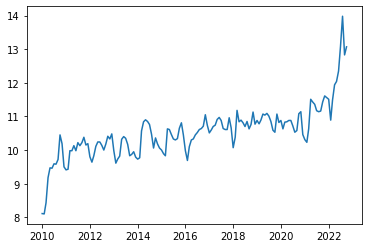

In [122]:
# Get the region and US fuel prices based on fuelType1 of the vehicle
if fuel_type == 'Regular Gasoline':
    region_car_fuel_prices = regular_gas[regular_gas['area-name'] == get_region('Tennessee')]
    region_car_fuel_prices = region_car_fuel_prices.sort_values(by='period')
    us_car_fuel_prices = regular_gas[regular_gas['area-name'] == 'U.S.']
    us_car_fuel_prices = us_car_fuel_prices.sort_values(by='period')
elif fuel_type == 'Premium Gasoline':
    region_car_fuel_prices = premium_gas[premium_gas['area-name'] == get_region('Tennessee')]
    region_car_fuel_prices = region_car_fuel_prices.sort_values(by='period')
    us_car_fuel_prices = premium_gas[premium_gas['area-name'] == 'U.S.']
    us_car_fuel_prices = us_car_fuel_prices.sort_values(by='period')
elif fuel_type == 'Midgrade Gasoline':
    region_car_fuel_prices = midgrade_gas[midgrade_gas['area-name'] == get_region('Tennessee')]
    region_car_fuel_prices = region_car_fuel_prices.sort_values(by='period')
    us_car_fuel_prices = midgrade_gas[midgrade_gas['area-name'] == 'U.S.']
    us_car_fuel_prices = us_car_fuel_prices.sort_values(by='period')
elif fuel_type == 'Diesel':
    region_car_fuel_prices = diesel[diesel['area-name'] == get_region('Tennessee')]
    region_car_fuel_prices = region_car_fuel_prices.sort_values(by='period')
    us_car_fuel_prices = diesel[diesel['area-name'] == 'U.S.']
    us_car_fuel_prices = us_car_fuel_prices.sort_values(by='period')
else:
    region_car_fuel_prices = electricity_prices[electricity_prices['state_name'] == state_in]
    region_car_fuel_prices = region_car_fuel_prices.sort_values(by='period')
    us_car_fuel_prices = us_elec.sort_values(by='period')

   
plt.plot(region_car_fuel_prices['period'], region_car_fuel_prices['price']);

# Get the average fuel prices and stds over the last few years
region_fuel_1_year_mean = round(region_car_fuel_prices['price'].iloc[-52:].mean(), 2)
region_fuel_2_year_mean = round(region_car_fuel_prices['price'].iloc[-(52 * 2):].mean(), 2)
region_fuel_3_year_mean = round(region_car_fuel_prices['price'].iloc[-(52 * 3):].mean(), 2)
region_fuel_4_year_mean = round(region_car_fuel_prices['price'].iloc[-(52 * 4):].mean(), 2)
region_fuel_5_year_mean = round(region_car_fuel_prices['price'].iloc[-(52 * 5):].mean(), 2)
all_mean = [region_fuel_1_year_mean, region_fuel_2_year_mean, region_fuel_3_year_mean, 
            region_fuel_4_year_mean, region_fuel_5_year_mean]

region_fuel_1_year_std = round(region_car_fuel_prices['price'].iloc[-52:].std(), 2)
region_fuel_2_year_std = round(region_car_fuel_prices['price'].iloc[-(52 * 2):].std(), 2)
region_fuel_3_year_std = round(region_car_fuel_prices['price'].iloc[-(52 * 3):].std(), 2)
region_fuel_4_year_std = round(region_car_fuel_prices['price'].iloc[-(52 * 4):].std(), 2)
region_fuel_5_year_std = round(region_car_fuel_prices['price'].iloc[-(52 * 5):].std(), 2)
all_std = [region_fuel_1_year_std, region_fuel_2_year_std, region_fuel_3_year_std, 
           region_fuel_4_year_std, region_fuel_5_year_std]

time_periods = ['1year', '2year', '3year' '4year', '5year']

region_car_fuel_prices_averages = pd.DataFrame({'time_period': ['1year', '2year', '3year', '4year', '5year'], 
                                   'mean': all_mean, 
                                    'std': all_std})

if fuel_type == 'Electricity':
    region_car_fuel_prices_averages['units'] = 'cents/kWH'
else:
    region_car_fuel_prices_averages['units'] = 'dollars/gal'

In [73]:
region_car_fuel_prices.head()

,period,State,Data Status,price,stateDescription
7845,2010-01-01,TN,Final,8.11,Tennessee
7794,2010-02-01,TN,Final,8.10,Tennessee
7743,2010-03-01,TN,Final,8.43,Tennessee
7692,2010-04-01,TN,Final,9.18,Tennessee
7641,2010-05-01,TN,Final,9.47,Tennessee


In [125]:
region_car_fuel_prices_averages

,time_period,mean,std,units
0,1year,11.19,0.74,cents/kWH
1,2year,10.86,0.66,cents/kWH
2,3year,10.53,0.78,cents/kWH
3,4year,10.53,0.78,cents/kWH
4,5year,10.53,0.78,cents/kWH


In [192]:
city_miles = 37
highway_miles = 0

## to do:
- ** Switch gas and diesel input to: https://www.eia.gov/petroleum/gasdiesel/includes/mogas_recent_prices_and_SEs.xlsx and https://www.eia.gov/petroleum/gasdiesel/includes/dieselfuel_recent_prices_and_SEs.xlsx -- DONE
- Calculate averages for the past few years for electricity -- DONE
- Make the gas price averages into a function to calculate the averages for gas or diesel depending on the vehicle -- DONE (part of main fuel_costs function)
- calculate the costs for EVs -- DONE and PHEVs -- DONE
- Calculate CO2 emmisions for each vehicle -- DONE

In [251]:
def price_averages(electricity_price_df, gas_price_df, fuel_type):
    # calculate the average petroleum fuel prices and stds over the last few years
    electric_1_year_mean = round(electricity_price_df['price'].iloc[-52:].mean(), 2)
    electric_2_year_mean = round(electricity_price_df['price'].iloc[-(52 * 2):].mean(), 2)
    electric_3_year_mean = round(electricity_price_df['price'].iloc[-(52 * 3):].mean(), 2)
    electric_4_year_mean = round(electricity_price_df['price'].iloc[-(52 * 4):].mean(), 2)
    electric_5_year_mean = round(electricity_price_df['price'].iloc[-(52 * 5):].mean(), 2)
    electricity_all_mean = [electric_1_year_mean, electric_2_year_mean, electric_3_year_mean, 
                electric_4_year_mean, electric_5_year_mean]

    electric_1_year_std = round(electricity_price_df['price'].iloc[-52:].std(), 2)
    electric_2_year_std = round(electricity_price_df['price'].iloc[-(52 * 2):].std(), 2)
    electric_3_year_std = round(electricity_price_df['price'].iloc[-(52 * 3):].std(), 2)
    electric_4_year_std = round(electricity_price_df['price'].iloc[-(52 * 4):].std(), 2)
    electric_5_year_std = round(electricity_price_df['price'].iloc[-(52 * 5):].std(), 2)
    electricity_all_std = [electric_1_year_std, electric_2_year_std, electric_3_year_std, 
               electric_4_year_std, electric_5_year_std]
    
    # calculate the average electricity fuel prices and stds over the last few years
    gas_1_year_mean = round(gas_price_df['price'].iloc[-52:].mean(), 2)
    gas_2_year_mean = round(gas_price_df['price'].iloc[-(52 * 2):].mean(), 2)
    gas_3_year_mean = round(gas_price_df['price'].iloc[-(52 * 3):].mean(), 2)
    gas_4_year_mean = round(gas_price_df['price'].iloc[-(52 * 4):].mean(), 2)
    gas_5_year_mean = round(gas_price_df['price'].iloc[-(52 * 5):].mean(), 2)
    gas_all_mean = [gas_1_year_mean, gas_2_year_mean, gas_3_year_mean, 
                gas_4_year_mean, gas_5_year_mean]

    gas_1_year_std = round(gas_price_df['price'].iloc[-52:].std(), 2)
    gas_2_year_std = round(gas_price_df['price'].iloc[-(52 * 2):].std(), 2)
    gas_3_year_std = round(gas_price_df['price'].iloc[-(52 * 3):].std(), 2)
    gas_4_year_std = round(gas_price_df['price'].iloc[-(52 * 4):].std(), 2)
    gas_5_year_std = round(gas_price_df['price'].iloc[-(52 * 5):].std(), 2)
    gas_all_std = [gas_1_year_std, gas_2_year_std, gas_3_year_std, 
               gas_4_year_std, gas_5_year_std]

    time_periods = ['1year', '2year', '3year' '4year', '5year']


    if fuel_type == 'Electricity':
        car_prices_averages = pd.DataFrame({'time_period': ['1year', '2year', '3year', 
                                                                            '4year', '5year'], 
                                           'electricity_mean': electricity_all_mean, 
                                            'electricity_std': electricity_all_std})
    else:
        car_prices_averages = pd.DataFrame({'time_period': ['1year', '2year', '3year', 
                                                                        '4year', '5year'], 
                                           'electricity_mean': electricity_all_mean, 
                                            'electricity_std': electricity_all_std,
                                           'gas_mean': gas_all_mean, 
                                           'gas_std': gas_all_std})

    return car_prices_averages

In [566]:
def price_averages(electricity_price_df, gas_price_df, fuel_type):
    # calculate the average petroleum fuel prices and stds over the last few years
    electric_3_year_mean = round(electricity_price_df['price'].iloc[-(52 * 3):].mean(), 2)

    electric_3_year_std = round(electricity_price_df['price'].iloc[-(52 * 3):].std(), 2)
    
    # calculate the average electricity fuel prices and stds over the last few years
    gas_3_year_mean = round(gas_price_df['price'].iloc[-(52 * 3):].mean(), 2)

    gas_3_year_std = round(gas_price_df['price'].iloc[-(52 * 3):].std(), 2)


    car_prices_averages = pd.DataFrame({'time_period': ['3year'], 
                                           'electricity_mean': electric_3_year_mean, 
                                            'electricity_std': electric_3_year_std,
                                           'gas_mean': gas_3_year_mean, 
                                           'gas_std': gas_3_year_std})

    return car_prices_averages

In [557]:
state_co2[state_co2['state_name'] == 'Tennessee']['co2_g/kWh'].iloc[0]

259.18450113

In [586]:
def fuel_costs(car_in, state_in):
    
    car_name = str(car_in['year']) + ' ' + car_in['make'] + ' ' + car_in['model']
    
    fuel_type = car_in['fuelType1']
    
    # Get the region and US fuel prices based on fuelType1 of the vehicle
    if fuel_type == 'Regular Gasoline':
        region_car_fuel_prices = regular_gas[regular_gas['area-name'] == get_region(state_in)]
        region_car_fuel_prices = region_car_fuel_prices.sort_values(by='period')
        us_car_fuel_prices = regular_gas[regular_gas['area-name'] == 'U.S.']
        us_car_fuel_prices = us_car_fuel_prices.sort_values(by='period')
    elif fuel_type == 'Premium Gasoline':
        region_car_fuel_prices = premium_gas[premium_gas['area-name'] == get_region(state_in)]
        region_car_fuel_prices = region_car_fuel_prices.sort_values(by='period')
        us_car_fuel_prices = premium_gas[premium_gas['area-name'] == 'U.S.']
        us_car_fuel_prices = us_car_fuel_prices.sort_values(by='period')
    elif fuel_type == 'Midgrade Gasoline':
        region_car_fuel_prices = midgrade_gas[midgrade_gas['area-name'] == get_region(state_in)]
        region_car_fuel_prices = region_car_fuel_prices.sort_values(by='period')
        us_car_fuel_prices = midgrade_gas[midgrade_gas['area-name'] == 'U.S.']
        us_car_fuel_prices = us_car_fuel_prices.sort_values(by='period')
    elif fuel_type == 'Diesel':
        region_car_fuel_prices = diesel[diesel['area-name'] == get_region(state_in)]
        region_car_fuel_prices = region_car_fuel_prices.sort_values(by='period')
        us_car_fuel_prices = diesel[diesel['area-name'] == 'U.S.']
        us_car_fuel_prices = us_car_fuel_prices.sort_values(by='period')
    else:
        region_car_fuel_prices = electricity_prices[electricity_prices['state_name'] == state_in]
        region_car_fuel_prices = region_car_fuel_prices.sort_values(by='period')
        us_car_fuel_prices = us_elec.sort_values(by='period')
        
    region_car_electric_prices = electricity_prices[electricity_prices['state_name'] == state_in]
    region_car_electric_prices = region_car_electric_prices.sort_values(by='period')
    us_car_electric_prices = us_elec.sort_values(by='period')
    

    # Average fuel prices for the last few years
    region_car_fuel_prices_averages = price_averages(region_car_electric_prices, region_car_fuel_prices, fuel_type)
    us_car_fuel_prices_averages = price_averages(us_car_electric_prices, us_car_fuel_prices, fuel_type)
    

    if car_in['fuelType1'] == 'Electricity':
        
        # electricity consumption in kWH/mile
        highway_E = car_in['highwayE'] / 100
        city_E = car_in['cityE'] / 100
        
        highway_electricity_consumption = highway_miles * highway_E
        city_electricity_consumption = city_miles * city_E
        
        # region fuel prices
        region_car_fuel_prices_averages['annual_cost'] = round(((highway_miles * highway_E) + \
        (city_miles * city_E)) * (region_car_fuel_prices_averages['electricity_mean'] / 100) * 365
                                                               , 2)

        region_car_fuel_prices_averages['annual_cost_std'] = round(((highway_miles * highway_E) + \
        (city_miles * city_E)) * (region_car_fuel_prices_averages['electricity_std'] / 100) * 365, 2)
        
        # US fuel prices
        us_car_fuel_prices_averages['annual_cost'] = round(((highway_miles * highway_E) + \
        (city_miles * city_E)) * (us_car_fuel_prices_averages['electricity_mean'] / 100) * 365, 2)

        us_car_fuel_prices_averages['annual_cost_std'] = round(((highway_miles * highway_E) + \
        (city_miles * city_E)) * (us_car_fuel_prices_averages['electricity_std'] / 100) * 365, 2)
        
        # CO2 emissions in Kg
        car_co2_tailpipe = car_in['co2TailpipeGpm'] * (city_miles + highway_miles)
        car_co2_state = round((highway_electricity_consumption + city_electricity_consumption) * \
                    state_co2[state_co2['state_name'] == state_in]['co2_g/kWh'].iloc[0] / 1000 * 365)
        car_co2_US = round(((highway_electricity_consumption + city_electricity_consumption) * \
                    us_co2_g_kwh) / 1000 * 365)
        
    elif car_in['atvType'] == 'Plug-in Hybrid':
        # electricity consumption in kWH / mile
        highway_E = car_in['highwayE'] / 100
        city_E = car_in['cityE'] / 100
        # gas fuel efficiency in MPG
        highway_mpg = car_in['highway08U']
        city_mpg = car_in['city08U']
        # Electric range
        range_highway = car_in['rangeHwyA']
        range_city = car_in['rangeCityA']
        
        # fraction of city driving vs highway driving
        city_drive_fraction = city_miles / (city_miles + highway_miles)
        highway_drive_fraction = 1 - city_drive_fraction
        
        # effective range in miles based on the fraction of city vs highway driving
        effective_range = (city_drive_fraction * range_city) + (highway_drive_fraction * range_highway)
        # effective electricity consumption in kWH/mile
        effective_efficiency = (city_drive_fraction * city_E) + (highway_drive_fraction * highway_E)
        # electricity usage in kWH
        daily_electricity_usage = effective_range * effective_efficiency
        
        # Calculate gas range if total miles driven exceeds electric range
        if (city_miles + highway_miles) > effective_range:
            # gas range in miles after depleting batteries
            gas_range = (city_miles + highway_miles) - effective_range
            # effective fuel efficiency (MPG) based on fraction of city vs highway driving
            effective_mpg = (city_drive_fraction * city_mpg) + (highway_drive_fraction * highway_mpg)
            # daily gas usage in gallons 
            daily_gas_usage = gas_range / effective_mpg
        else:
            # gas usage if batteries are never depleted
            daily_gas_usage = 0
        
        # region fuel prices and standard deviations
        region_car_fuel_prices_averages['annual_cost'] = round(((daily_electricity_usage * 
                                                                 region_car_fuel_prices_averages['electricity_mean'] / 
                                                                 100) + (daily_gas_usage * 
                                                                 region_car_fuel_prices_averages['gas_mean'])) * 
                                                               365, 2)
        
        region_car_fuel_prices_averages['annual_cost_std'] = round(((daily_electricity_usage * \
                                                          region_car_fuel_prices_averages['electricity_std'] / 100) + \
        (daily_gas_usage * region_car_fuel_prices_averages['gas_std'])) * 365, 2)
        
        # US fuel prices and standard deviations
        us_car_fuel_prices_averages['annual_cost'] = round(((daily_electricity_usage * \
                                                          us_car_fuel_prices_averages['electricity_mean'] / 100) + \
        (daily_gas_usage * us_car_fuel_prices_averages['gas_mean'])) * 365, 2)
        
        us_car_fuel_prices_averages['annual_cost_std'] = round(((daily_electricity_usage * \
                                                          us_car_fuel_prices_averages['electricity_std'] / 100) + \
        (daily_gas_usage * us_car_fuel_prices_averages['gas_std'])) * 365, 2)
        
        # CO2 emissions in grams
        car_co2_tailpipe = round(car_in['co2TailpipeGpm'] * gas_range)
        car_co2_state = round(((car_in['co2TailpipeGpm'] * gas_range) + (daily_electricity_usage * 
                        state_co2[state_co2['state_name'] == state_in]['co2_g/kWh'].iloc[0])) / 1000 * 365)
        car_co2_US = round(((car_in['co2TailpipeGpm'] * gas_range) + (daily_electricity_usage * 
                        us_co2_g_kwh)) / 1000 * 365)
        
    else:
        # Fuel Efficiency
        highway_mpg = car_in['highway08U']
        city_mpg = car_in['city08U']
        
        # Region fuel prices
        region_car_fuel_prices_averages['annual_cost'] = round(((highway_miles / highway_mpg) + \
        (city_miles / city_mpg)) * 365 * region_car_fuel_prices_averages['gas_mean'], 2)

        region_car_fuel_prices_averages['annual_cost_std'] = round(((highway_miles / highway_mpg) + \
        (city_miles / city_mpg)) * 365 * region_car_fuel_prices_averages['gas_std'], 2)
        
        # US fuel prices
        us_car_fuel_prices_averages['annual_cost'] = round(((highway_miles / highway_mpg) + \
        (city_miles / city_mpg)) * 365 * us_car_fuel_prices_averages['gas_mean'], 2)

        us_car_fuel_prices_averages['annual_cost_std'] = round(((highway_miles / highway_mpg) + \
        (city_miles / city_mpg)) * 365 * us_car_fuel_prices_averages['gas_std'], 2)
        
        # CO2 emissions in Kg
        car_co2_tailpipe = round((car_in['co2TailpipeGpm'] * (city_miles + highway_miles)) / 1000 * 365)
        car_co2_state = car_co2_tailpipe
        car_co2_US = car_co2_tailpipe

    region_car_fuel_prices_averages['area'] = state_in
    us_car_fuel_prices_averages['area'] = 'US'
    
    region_car_fuel_prices_averages['name'] = car_name
    us_car_fuel_prices_averages['name'] = car_name
    
    fuel_prices_averages = pd.concat([region_car_fuel_prices_averages, us_car_fuel_prices_averages])
    fuel_prices_averages = fuel_prices_averages[['time_period', 'area', 'annual_cost', 'annual_cost_std', 
                                                'name']]
    
    
#     return region_car_fuel_prices_averages, us_car_fuel_prices_averages, car_co2_state, car_co2_US, car_co2_tailpipe
    return fuel_prices_averages, car_co2_state, car_co2_US, car_co2_tailpipe, car_name


In [587]:
# region_prices, us_prices, car_co2_state, car_co2_US, car_co2_tailpipe = fuel_costs(car3, 'Tennessee')
car1_costs, car1_co2_state, car1_co2_US, car1_co2_tailpipe, car1_name = fuel_costs(car1, 'Tennessee')
car2_costs, car2_co2_state, car2_co2_US, car2_co2_tailpipe, car2_name = fuel_costs(car2, 'Tennessee')
car3_costs, car3_co2_state, car3_co2_US, car3_co2_tailpipe, car3_name = fuel_costs(car3, 'Tennessee')

In [642]:
co2_all = pd.DataFrame({'tailpipe_co2': [car1_co2_tailpipe, car2_co2_tailpipe], 
                        'state_co2': [car1_co2_state, car2_co2_state], 
                        'US_co2': [car1_co2_US, car2_co2_US], 
                       'name': [car1_name, car2_name]})

In [588]:
car1_costs

,time_period,area,annual_cost,annual_cost_std,name
0,3year,Tennessee,629.78,46.65,2022 Ford F-150 Lightning 4WD
0,3year,US,760.16,57.42,2022 Ford F-150 Lightning 4WD


In [589]:
car2_costs

,time_period,area,annual_cost,annual_cost_std,name
0,3year,Tennessee,2084.79,583.16,2022 Ford F150 Pickup 4WD
0,3year,US,2135.82,575.87,2022 Ford F150 Pickup 4WD


In [590]:
car3_costs

,time_period,area,annual_cost,annual_cost_std,name
0,3year,Tennessee,607.70,63.92,2022 Chrysler Pacifica Hybrid
0,3year,US,716.73,72.41,2022 Chrysler Pacifica Hybrid


In [595]:
car_costs_all = pd.concat([car1_costs, car2_costs])

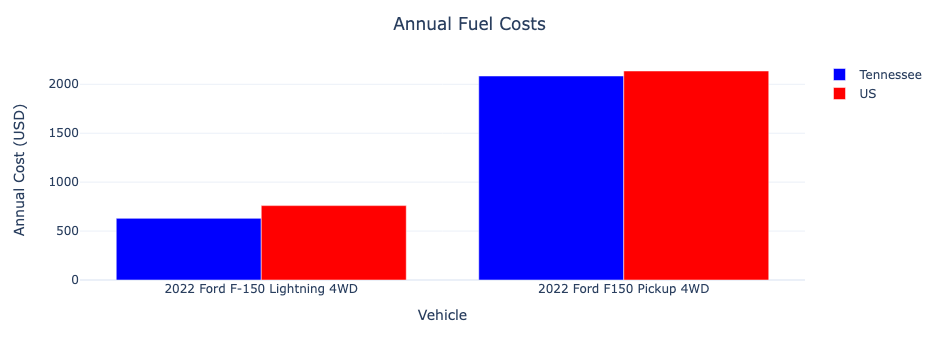

In [665]:
fig = px.bar(car_costs_all, y='annual_cost', x='name',
       color='area', barmode='group', 
      labels={'name': 'Vehicle', 'annual_cost': 'Annual Cost (USD)', 'area': ''}, 
      color_discrete_map={state_in: 'blue', 'US': 'red'}, template='plotly_white')
fig.update_layout(title_text='Annual Fuel Costs', title_x=0.5)

In [643]:
co2_all

,tailpipe_co2,state_co2,US_co2,name
0,0.0,1550,2143,2022 Ford F-150 Lightning 4WD
1,5848.0,5848,5848,2022 Ford F150 Pickup 4WD


In [663]:
import plotly.io as pio
pio.templates.default = 'plotly_whilte'
pio.templates

ValueError: 
    Invalid value of type 'builtins.str' received for the 'template' property of layout
        Received value: 'plotly_whilte'

    The 'template' property is an instance of Template
    that may be specified as:
      - An instance of :class:`plotly.graph_objs.layout.Template`
      - A dict of string/value properties that will be passed
        to the Template constructor

        Supported dict properties:
            
            data
                :class:`plotly.graph_objects.layout.template.Da
                ta` instance or dict with compatible properties
            layout
                :class:`plotly.graph_objects.Layout` instance
                or dict with compatible properties

      - The name of a registered template where current registered templates
        are stored in the plotly.io.templates configuration object. The names
        of all registered templates can be retrieved with:
            >>> import plotly.io as pio
            >>> list(pio.templates)  # doctest: +ELLIPSIS
            ['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', ...]

      - A string containing multiple registered template names, joined on '+'
        characters (e.g. 'template1+template2'). In this case the resulting
        template is computed by merging together the collection of registered
        templates

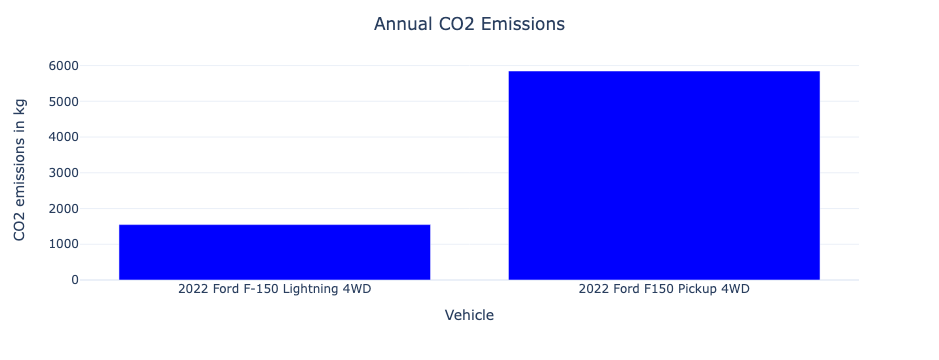

In [664]:
fig = px.bar(co2_all, y='state_co2', x='name', color_discrete_map={'name': 'blue'}, 
      labels={'name': 'Vehicle', 'state_co2': 'CO2 emissions in kg'}, template='plotly_white')
fig.update_layout(title_text='Annual CO2 Emissions', title_x=0.5)
fig.update_traces(marker_color='blue')

In [56]:
def fuel_cost(fuel_price, car_in):
    '''function to calculate fuel costs for different types of vehicles.
    
    variables:
    
    fuel_price (DataFrame): Timeseries DataFrame containing gas and diesel prices in dollars per gallon, 
                            and electricity prices in cents per kWH.
    
    car_in (Pandas Series): series that contains all the vehicle information from the cars DataFrame
    
    '''
    
    # factor to multiply with weekly fuel usage to calculate monthly fuel usage
    time_multiple = 365 / 12 / 7

    # EV fuel cost
    if car_in['fuelType1'] == 'Electricity':
        
        # Electricity consumption in kWh/mile 
        highway_E = car_in['highwayE'] / 100
        city_E = car_in['cityE'] / 100

        # Combined EV fuel efficiency for weekdays and weekends
        combined_weekday_kW_mile = ((weekday_C / weekday_all) * city_E) + ((weekday_H / weekday_all) * highway_E)
        combined_weekend_kW_mile = ((weekend_C / weekend_all) * city_E) + ((weekend_H / weekend_all) * highway_E)

        # daily fuel usage for weekdays and weekends
        # miles driven per day * kWh per mile
        weekday_daily_fuel_usage = weekday_all * combined_weekday_kW_mile
        weekend_daily_fuel_usage = weekend_all * combined_weekend_kW_mile
        
        interval_fuel_usage = ((weekday_daily_fuel_usage * 5) + (weekend_daily_fuel_usage * 2)) * time_multiple
        print(f'monthly EV electricity usage: {interval_fuel_usage}')

        # total interval fual cost in dollars
        total_interval_fuel_cost = interval_fuel_usage * fuel_price['electricity'] / 100
        
        # total interval CO2 emissions 
        interval_co2 = ((weekday_all * 5) + (weekend_all * 2)) * time_multiple * car_in['co2TailpipeGpm'] / 1000
        
    # Plug-in Hybrid fuel cost
    elif car_in['atvType'] == 'Plug-in Hybrid':
        
        # Electricity consumption in kWh/mile 
        highway_E = car_in['highwayE'] / 100
        city_E = car_in['cityE'] / 100

        # Fuel efficiency in MPG
        highwayMPG = car_in['highway08']
        cityMPG = car_in['city08']

        # Electricity range
        highway_range = car_in['rangeHwyA']
        city_range = car_in['rangeCityA']

        effective_city_range_weekday = (weekday_C / weekday_all) * city_range
        effective_highway_range_weekday = (weekday_H / weekday_all) * highway_range

        combined_range_weekday = effective_city_range_weekday + effective_highway_range_weekday

        effective_city_range_weekend = (weekend_C / weekend_all) * city_range
        effective_highway_range_weekend = (weekend_H / weekend_all) * highway_range

        combined_range_weekend = effective_city_range_weekend + effective_highway_range_weekend

        
        # Combined electric fuel efficiency for weekdays and weekends
        combined_weekday_kW_mile = ((weekday_C / weekday_all) * city_E) + ((weekday_H / weekday_all) * highway_E)
        combined_weekend_kW_mile = ((weekend_C / weekend_all) * city_E) + ((weekend_H / weekend_all) * highway_E)

        # daily electricity usage for weekdays and weekends
        # miles driven per day * kWh per mile
        weekday_daily_electric_usage = combined_range_weekday * combined_weekday_kW_mile
        weekend_daily_electric_usage = combined_range_weekend * combined_weekend_kW_mile

        # calculate gas usage only if daily miles exceed electric range
        weekday_daily_gas_usage = 0
        weekend_daily_gas_usage = 0
        gas_range_weekday = 0
        gas_range_weekend = 0

        if weekday_all > combined_range_weekday:

            # gas range after depleting the batteries
            gas_range_weekday = weekday_all - combined_range_weekday

            # Combined fuel efficiency for weekdays
            combined_weekday_mpg = ((weekday_C / weekday_all) * cityMPG) + ((weekday_H / weekday_all) * highwayMPG)

            # daily fuel usage for weekdays in gallons
            weekday_daily_gas_usage = gas_range_weekday / combined_weekday_mpg

        if weekend_all > combined_range_weekend:

            gas_range_weekend = weekend_all - combined_range_weekend

            # Combined fuel efficiency for weekdays
            combined_weekend_mpg = ((weekend_C / weekend_all) * cityMPG) + ((weekend_H / weekend_all) * highwayMPG)

            # daily fuel usage for weekdays in gallons
            weekend_daily_gas_usage = gas_range_weekend / combined_weekend_mpg
        
        interval_electricity_usage = ((weekday_daily_electric_usage * 5) \
                                    + (weekend_daily_electric_usage * 2)) * time_multiple
        
        interval_gas_usage = ((weekday_daily_gas_usage * 5) + (weekend_daily_gas_usage * 2)) * time_multiple
        
        print(f'monthly PHEV gas usage: {interval_gas_usage}')
        print(f'monthly PHEV electricity usage: {interval_electricity_usage}')

        # total interval fual cost
        total_interval_fuel_cost = (interval_electricity_usage * fuel_price['electricity'] / 100) \
                                    + (interval_gas_usage * fuel_price['gas'])
        
        # total interval CO2 emissions 
        interval_co2 = ((gas_range_weekday * 5) + (gas_range_weekend * 2)) \
                        * time_multiple * car_in['co2TailpipeGpm'] / 1000
        
    # ICE fuel cost:
    else:
        
        # mpg
        highwayMPG = car_in['highway08']
        cityMPG = car_in['city08']

        # Combined fuel efficiency for weekdays and weekends
        combined_weekday_mpg = ((weekday_C / weekday_all) * cityMPG) + ((weekday_H / weekday_all) * highwayMPG)
        combined_weekend_mpg = ((weekend_C / weekend_all) * cityMPG) + ((weekend_H / weekend_all) * highwayMPG)

        # daily fuel usage for weekdays and weekends
        weekday_daily_fuel_usage = weekday_all / combined_weekday_mpg
        weekend_daily_fuel_usage = weekend_all / combined_weekend_mpg
        print(weekday_daily_fuel_usage)
        
        interval_fuel_usage = ((weekday_daily_fuel_usage * 5) + (weekend_daily_fuel_usage * 2)) * time_multiple
        print(f'monthly ICE gas usage: {interval_fuel_usage}')

        # total interval fual cost
        if car_in['fuelType1'] == 'Diesel':
            total_interval_fuel_cost = interval_fuel_usage * fuel_price['diesel']
        else:
            total_interval_fuel_cost = interval_fuel_usage * fuel_price['gas']
        
        # total interval CO2 emissions 
        interval_co2 = ((weekday_all * 5) + (weekend_all * 2)) * time_multiple * car_in['co2TailpipeGpm'] / 1000
    print(f'Monthly CO2 emissions (kg): {interval_co2.round(1)}')
        
    return total_interval_fuel_cost, interval_co2

In [57]:


# daily weekday and weekend driving distances in miles
weekday_H = 10
weekday_C = 15
weekend_H = 10
weekend_C = 15
weekday_all = weekday_H + weekday_C
weekend_all = weekend_H + weekend_C

In [58]:
region_prices['car1_fuel_cost'], region_prices['car1_co2'] = fuel_cost(region_prices, car1)
region_prices['car2_fuel_cost'], region_prices['car2_co2'] = fuel_cost(region_prices, car2)
# region_prices['car3'] = fuel_cost(region_prices, car3)

NameError: name 'region_prices' is not defined

In [25]:
region_prices.head()

,diesel,gas,electricity,car1_fuel_cost,car1_co2,car2_fuel_cost,car2_co2
period,,,,,,,
2001-02-01,1.47400,1.43300,6.23,43.197359,268.474053,10.504702,0.0
2001-03-01,1.37450,1.37225,6.32,41.366069,268.474053,10.656455,0.0
2001-04-01,1.40160,1.55940,6.36,47.007650,268.474053,10.723901,0.0
2001-05-01,1.53675,1.76775,6.46,53.288299,268.474053,10.892516,0.0
2001-06-01,1.49450,1.57300,6.37,47.417618,268.474053,10.740762,0.0


In [26]:
car1_info = car1['year'], car1['make'], car1['model']
car2_info = car2['year'], car2['make'], car2['model']

In [27]:
car1_annual_co2 = (region_prices['car1_co2'].iloc[0] * 12).astype('int')

car2_annual_co2 = (region_prices['car2_co2'].iloc[0] * 12).astype('int')

In [28]:
print(f'Annual CO2 emissions for {car1_info[0]} {car1_info[1]} {car1_info[2]} is: {car1_annual_co2} kg')
print(f'Annual CO2 emissions for {car2_info[0]} {car2_info[1]} {car2_info[2]} is: {car2_annual_co2} kg')


Annual CO2 emissions for 2004 Subaru Forester AWD is: 3221 kg
Annual CO2 emissions for 2017 Tesla Model 3 Long Range is: 0 kg


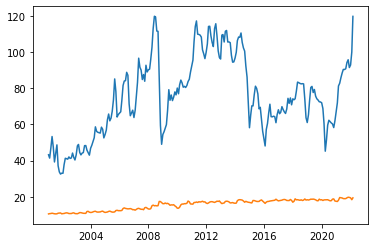

In [29]:
plt.plot(region_prices.index, region_prices['car1_fuel_cost'])
plt.plot(region_prices.index, region_prices['car2_fuel_cost'])
# plt.plot(region_prices.index, region_prices['car3']);

In [30]:
# region_prices['car1_cumulative'] = region_prices['car1'].cumsum()
# region_prices['car2_cumulative'] = region_prices['car2'].cumsum()


In [31]:
# plt.plot(region_prices.index, region_prices['car1_cumulative'])
# plt.plot(region_prices.index, region_prices['car2_cumulative'])


In [32]:
test = region_prices.loc['2017-03-01':]

In [33]:
test['car1_cumulative'] = test['car1_fuel_cost'].cumsum()
test['car2_cumulative'] = test['car2_fuel_cost'].cumsum()
# test['car3_cumulative'] = test['car3'].cumsum()

<ipython-input-33-d48873d0ca34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['car1_cumulative'] = test['car1_fuel_cost'].cumsum()
<ipython-input-33-d48873d0ca34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['car2_cumulative'] = test['car2_fuel_cost'].cumsum()


In [34]:
test['car1_co2_cumulative'] = test['car1_co2'].cumsum()
test['car2_co2_cumulative'] = test['car2_co2'].cumsum()

<ipython-input-34-441017b80521>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['car1_co2_cumulative'] = test['car1_co2'].cumsum()
<ipython-input-34-441017b80521>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['car2_co2_cumulative'] = test['car2_co2'].cumsum()


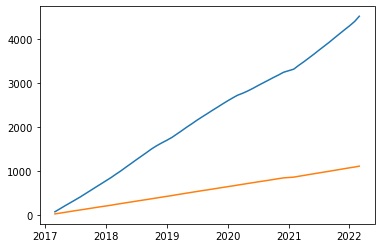

In [35]:
plt.plot(test.index, test['car1_cumulative'])
plt.plot(test.index, test['car2_cumulative']);
# plt.plot(test.index, test['car3_cumulative']);

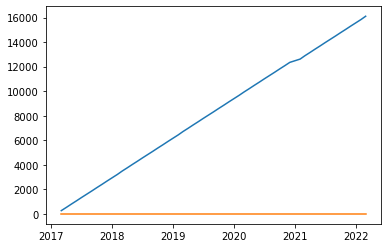

In [36]:
plt.plot(test.index, test['car1_co2_cumulative'])
plt.plot(test.index, test['car2_co2_cumulative']);

In [37]:
test['car1_cumulative'].iloc[-1] - test['car2_cumulative'].iloc[-1]

3410.7308378275284

In [38]:
test['car1_co2_cumulative'].iloc[-1].round(1) - test['car2_co2_cumulative'].iloc[-1].round(1)

16108.4

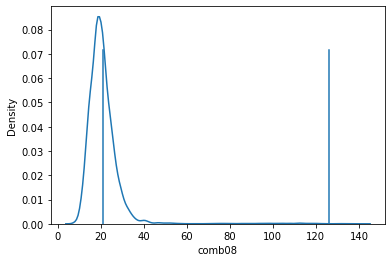

In [39]:
sns.kdeplot(x='comb08', data=cars)
plt.axvline(car1['comb08'], 0, 0.8)
plt.axvline(car2['comb08'], 0, 0.8)

In [40]:
cars['year_binned'] = pd.cut(cars['year'], bins=[1980, 1990, 2000, 2010, 2020, 2030], 
                             labels=['1980s', '1990s', '2000s', '2010s', '2020s'])

In [615]:
ev = cars[cars['fuelType1'] == 'Electricity']
ice = cars[(cars['fuelType1'] != 'Electricity') & (cars['fuelType2'] != 'Electricity') & (cars['atvType'] != 'Hybrid')]
phev = cars[cars['atvType'] == 'Plug-in Hybrid']
hybrids = cars[cars['atvType'] == 'Hybrid']

In [75]:
def cost_mile_ice(car):
    if car['fuelType1'] == 'Diesel':
        out = latest_region_price['diesel'] / car['comb08']
    else:
        out = latest_region_price['gas'] / car['comb08']
    return out

In [245]:
latest_region_price = region_prices.iloc[-1]

ev['cost_per_mile'] = ev['combE'].apply(lambda x: x / 100 * latest_region_price['electricity'] / 100)
ice['cost_per_mile'] = ice['comb08'].apply(lambda x: latest_region_price['gas'] / x)
hybrids['cost_per_mile'] = hybrids['comb08'].apply(lambda x: latest_region_price['gas'] / x)

NameError: name 'region_prices' is not defined

In [72]:
latest_region_price['gas']

3.971

In [80]:
ice.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb,year_binned,cost_per_mile
0,14.167143,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,3200,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,1980s,0.189095
1,27.046364,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,6100,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-18000,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,1980s,0.361000
2,11.018889,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,2500,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,1980s,0.147074
3,27.046364,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,6100,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-18000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,1980s,0.361000
4,15.658421,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,4150,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-8250,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,1990s,0.209000


In [44]:
ice['atvType'].value_counts()

FFV             1498
Diesel          1160
CNG               50
Bifuel (CNG)      20
Bifuel (LPG)       8
Name: atvType, dtype: int64

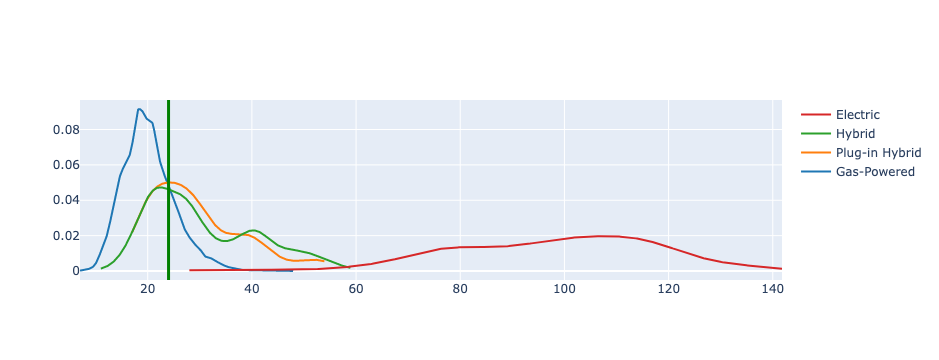

In [364]:
import plotly.figure_factory as ff

hist_data = [ice['comb08'], phev['comb08'], hybrids['comb08'], ev['comb08']]
group_labels = ['Gas-Powered', 'Plug-in Hybrid', 'Hybrid', 'Electric']
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig.add_vline(x=xpos, line_width=3, line_color='green')
fig.show()

In [638]:
co2_car2 = car2['co2TailpipeGpm']
co2_car3 = car3['co2TailpipeGpm']

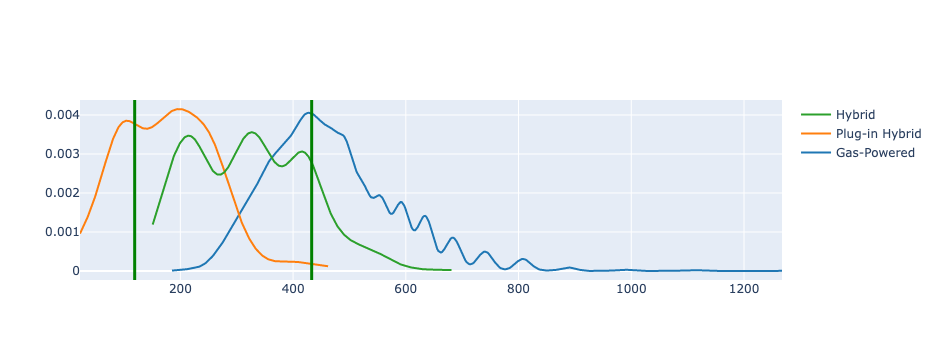

In [639]:
import plotly.figure_factory as ff

hist_data = [ice['co2TailpipeGpm'], phev['co2TailpipeGpm'], hybrids['co2TailpipeGpm']]
group_labels = ['Gas-Powered', 'Plug-in Hybrid', 'Hybrid']
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig.add_vline(x=co2_car2, line_width=3, line_color='green')
fig.add_vline(x=co2_car3, line_width=3, line_color='green')
fig.show()

NameError: name 'car1' is not defined

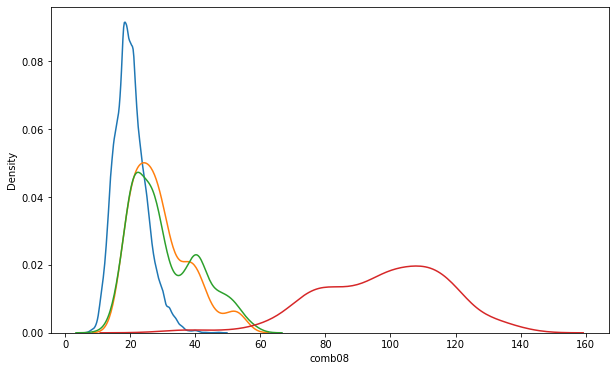

In [247]:
plt.subplots(figsize=(10, 6))
sns.kdeplot(x='comb08', data=ice)
sns.kdeplot(x='comb08', data=phev)
sns.kdeplot(x='comb08', data=hybrids)
sns.kdeplot(x='comb08', data=ev)
plt.axvline(car1['comb08'], 0, 0.5, c='k')
plt.axvline(car2['comb08'], 0, 0.5, c='b')
plt.legend(['Gas Powered Vehicles', 'Plug-in Hybrids', 'Hybrids', 'Electric Vehicles',
            car1_name, car2_name], loc='upper right')
plt.title('Vehicle Combined Fuel Efficiency')
plt.xlabel('Combined MPG(e)');

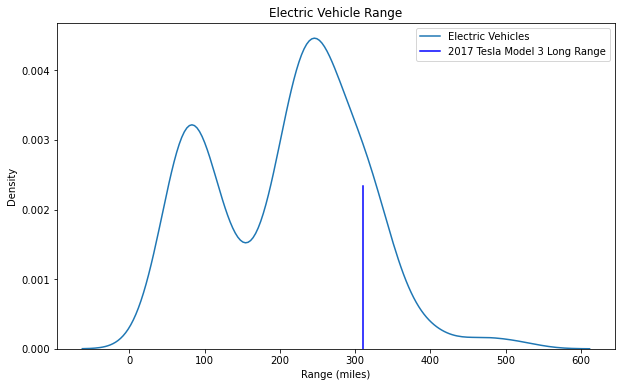

In [46]:
plt.subplots(figsize=(10, 6))
sns.kdeplot(x='range', data=ev)
plt.axvline(car2['range'], 0, 0.5, c='b')
plt.legend(['Electric Vehicles', car2_name], loc='upper right')
plt.title('Electric Vehicle Range')
plt.xlabel('Range (miles)');